<a href="https://colab.research.google.com/github/VictorV1ana/Fraudes_cartao_de_credito/blob/master/Final_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito_Victor_Viana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, irei abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.
![alt text](https://drive.google.com/uc?id=123Fmci9t_bUxzyZ0ncaAGDLEQ549K0q5)
Photo by Ryan Born on Unsplash


Dentre essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento. Podendo gerar a insatisfação ou perda de clientes, se acontecer com frequência.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [0]:
#@title
#suprimir os warnings 
from warnings import simplefilter 
simplefilter(action="ignore", category= FutureWarning)
# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [0]:
# importar os pacotes necessários
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scikitplot as skplt
import numpy as np

#modelos e métricas 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score , roc_curve , accuracy_score

from imblearn.under_sampling import RandomUnderSampler

#estilo dos gráficos do seaborn 
sns.set_style('dark')



Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [0]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

##Análise Exploratória

### Primeiras entradas 

In [0]:
# plotar as 5 primeiras entradas 
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Analisando as primeiras entradas podemos tirar algumas conclusões:
*  A transformação PCA deixou as variáveis descaracterizadas em valores numéricos 
* As variáveis preservadas foram : `Time`, `Amount` e `Class`
* O nosso alvo é `Class` :
  * **0** são transações normais 
  * **1** são transações fraudulentas 

### Resumo Estatístico
O resumo estatístico permitirá a análise mais específica das variáveis além de identificar possíveis discrepâncias.

In [0]:
# plotar resumo estatistico 
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


* Não existe discrepância aparente 
* Os valores das transações são em média de 88.34 e mais de 75% delas são abaixo de 77.16 - valores mais baixos como esperado. Esse fator pode ser um dos critérios de decisão do modelo de Machine Learning.

### Informações sobre dados e variáveis 

* O dataframe não possui valores nulos :

In [0]:
# verificar valores nulos 
df.isnull().sum().max()

0

* Como é informado na descrição dos dados, as transações fraudulentas são apenas 0,17% do total. Essa quantidade pequena de valores "alvo" dificultada o modelo a fazer previsões, nesse sentido deverá ser feito um balanceamento.
* O gráfico de barras mostra a alta discrepância: 

0    284315
1       492
Name: Class, dtype: int64

 As transações fraudulentas representam 0.1727% do dataset



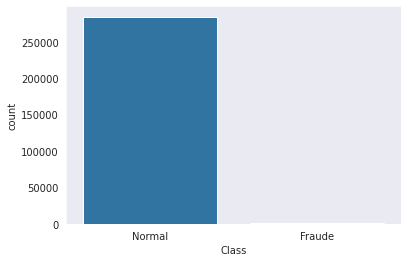

In [0]:
# ver o balanceamento de classes 
print(df.Class.value_counts())
print("\n As transações fraudulentas representam {:.4f}% do dataset\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# plotar gráfico 
fig, ax = plt.subplots()
sns.countplot("Class", data =df , ax=ax)
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.tight_layout;

* Histograma Transações x Tempo : 


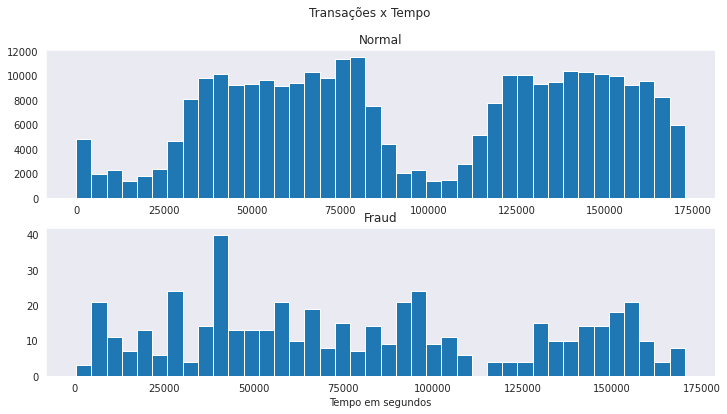

In [0]:
#plotar histograma
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,6))
num_bins = 40 
fig.suptitle("Transações x Tempo")

#histograma transações normais x tempo 
ax[0].hist(df.Time[df.Class==0], bins = num_bins)
ax[0].set_title("Normal")

#histograma fraudes x tempo 
ax[1].hist(df.Time[df.Class==1], bins=num_bins)
ax[1].set_xlabel("Tempo em segundos" )
ax[1].set_title("Fraud")

plt.tight_layout;

Nenhum padrão/ relação foi identificado 

* Histograma Transações x Amount :

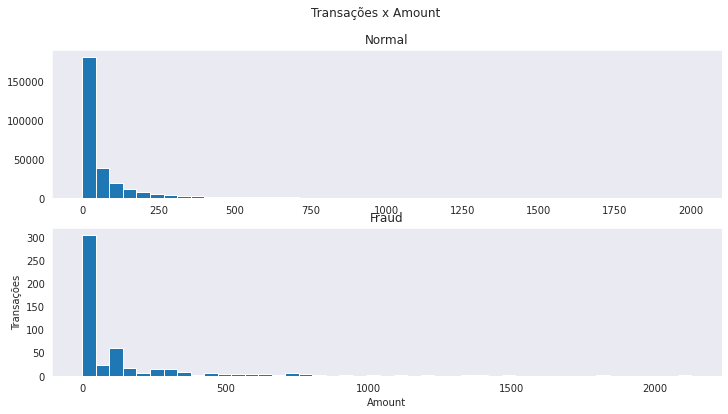

In [7]:
# plotar histograma 
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,6))
num_bins1 = 40
num_bins = 45
fig.suptitle("Transações x Amount")

ax[0].hist(df.Amount[(df.Class==0) & (df.Amount<2000)], bins=num_bins)
ax[0].set_title("Normal")

ax[1].hist(df.Amount[df.Class==1], bins=num_bins)
ax[1].set_xlabel("Amount" )
ax[1].set_title("Fraud")

plt.ylabel("Transações")
plt.tight_layout;

O comportamento é similar porém com algumas diferenças principalmente em valores maiores que 500

* Comparação da distribuição de amount : 


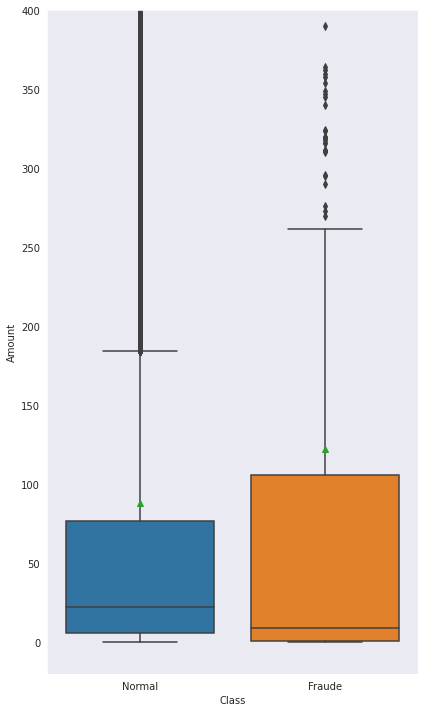

In [0]:
# plotar boxplots 
fig , ax = plt.subplots(figsize=(6,10), sharex=True)
sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20,400))
plt.xticks([0,1],["Normal","Fraude"])

plt.tight_layout()

Percebe-se uma diferença significativa na distribuição entre as duas classes. Provavelmente irá contribuir para o treinamento do modelo. 

* Informações sobre as operações fraudulentas :
  * Média é 118 
  * Mediana é 9 
  * Desvio padrão de 240

In [0]:
# informações estatística das fraudes 
df[(df.Class== 1)& (df.Amount<2000)].Amount.describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

#### Correlações 

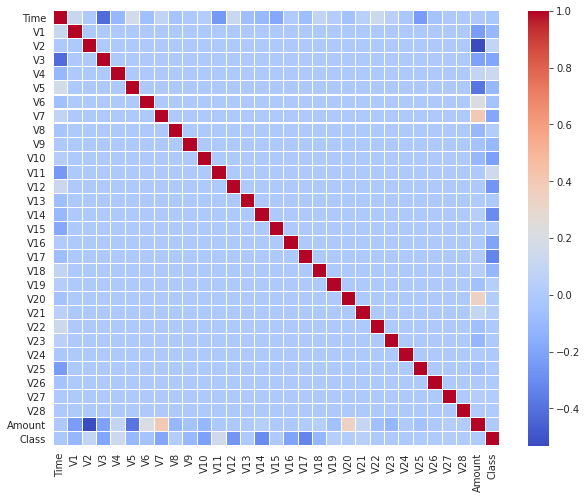

In [0]:
corr= df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap="coolwarm",linewidths=.1,ax =ax)

Como os dados não estão normalizados e balanceados não conseguimos encontrar as correlações.

## Preparação dos Dados

Para nutrir o nosso modelo iremos :
* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e teste
* Balancear o conjunto de dados

### Normalizar `Time` e `Amount`



In [0]:
# copia do df 
df_clean = df.copy()

#normalizar 
std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# primeiras entradas 
df_clean.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


### Dividir entre conjunto de treino e teste

Para gararntir que o balanceamento de dados seja adequado, vamos separar os já existentes entre treino e teste.

Além disso, para garantir a distribuição proporcional de classes usamos `stratify=True`.

In [0]:
# separar as variáveis X e y 
X = df_clean.drop('Class', axis= 1)
y = df_clean["Class"]

# dividir entre treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)


### Balanceamento dos Dados

Para balancear os dados será usado o *Under-sampling* pela biblioteca `imblearn`, preservando a classe minoritária(alvo).




1    369
0    369
dtype: int64


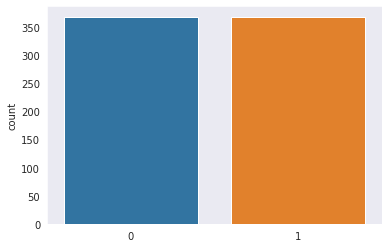

In [0]:
# aplicar o undersampling 
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train,y_train)

# ver o balanceamento 
print(pd.Series(y_rus).value_counts())

#plotar gráfico de barras 
sns.countplot(y_rus);

* Com os dados balanceados agente pode plotar a matriz de correlação e identificar quais variáveis estão mais fortemente relacionadas com as outras:


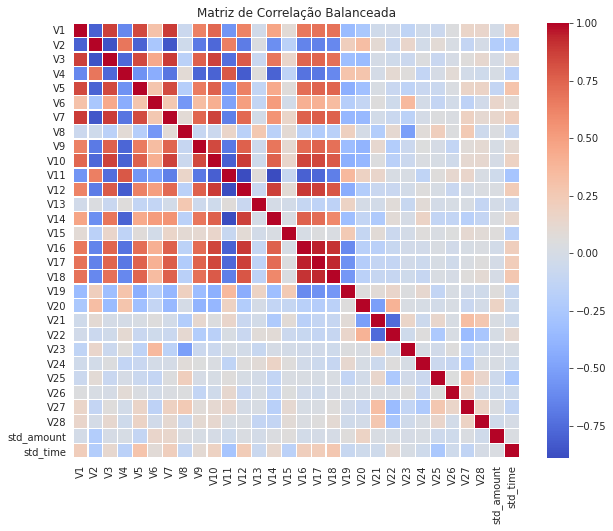

In [0]:
#plotar matriz correlação 
corre_rus = pd.DataFrame(X_rus).corr()
corr = X_train.corr()

fig , ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(corre_rus,linewidths=.1,cmap="coolwarm", xticklabels=corr.columns, yticklabels=corr.columns, ax=ax)

ax.set_title("Matriz de Correlação Balanceada")


plt.tight_layout;

Pode-se perceber que existem algumas variáveis que se relacionam diretamente, algo que antes do balanceamento não era percebido. Assim, demonstrando a importancia da ferramenta para alimentar de melhor forma nosso modelo de Machine Learning.

## Modelo de Machine Learning

Com os dados balanceado e a análise exploratória feita , vamos construir um modelo de classificação utilizando a Regressão Logística. 

O modelo será treinado em X_rus e y_rus e depois faremos previsões sobre os dados de teste.

In [0]:
# instaciar e treinar o modelo de regressão logística 
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazer as previsões
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Com o modelo treinado e previsões feitas, partimos para aviliar o desempenho.

**Avaliar o desempenho do modelo**

Como os falsos negativos nesse caso são o que terão mais custos a empresa as métrica principla de avaliação do desempenho será o Recall e Matriz de Confusão. 

Outras métricas utilizadas serão : AOC - área sobre curva para avaliar a eficiência e a Acurácia.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9674    0.9834     71079
           1     0.0465    0.9187    0.0885       123

    accuracy                         0.9673     71202
   macro avg     0.5232    0.9430    0.5359     71202
weighted avg     0.9982    0.9673    0.9818     71202

Acurácia: 0.9673

AUC: 0.9430



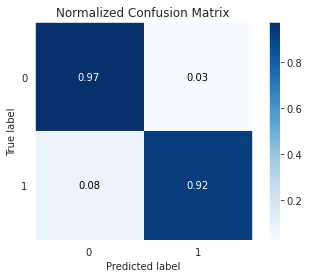

In [0]:
# plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True)

# imprimir relatório de classificação 
print('Relatório de Classificação:\n', classification_report(y_test,y_pred,digits=4))

# imprimir Acurácia 
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# Imprimir área sobre curva 
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

* Pelo *Recall* alto (96% e 91%) pode-se afirmar que o modelo tem uma acertividade alta, apenas 6% de falsos negativos.
* Acurácia de 96% 
* AUC - 94,3%



### Decision tree

In [0]:
#importar pacote
from sklearn.tree import DecisionTreeClassifier
# criar e treinar um modelo de Regressão Linear
dt_model = DecisionTreeClassifier(max_depth=5, criterion="entropy")
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# testar o modelo 
y_tpred = dt_model.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     71079
           1     0.8868    0.7642    0.8210       123

    accuracy                         0.9994     71202
   macro avg     0.9432    0.8820    0.9103     71202
weighted avg     0.9994    0.9994    0.9994     71202

Acurácia: 0.9994

AUC: 0.8820



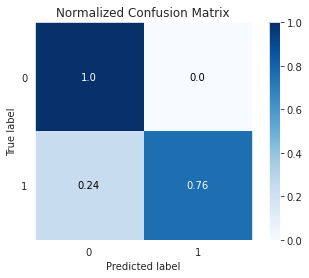

In [0]:
# plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_tpred, normalize = True)

# imprimir relatório de classificação 
print('Relatório de Classificação:\n', classification_report(y_test,y_tpred,digits=4))

# imprimir Acurácia 
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_tpred)))

# Imprimir área sobre curva 
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_tpred)))

* Apesar de ter acurácia de 99,9% o modelo tem menor recall, f1-score e AUC do que o de regressão logística 

### XGBoost

In [0]:
# criar e treinar um modelo 
from xgboost import XGBClassifier
ml_model = XGBClassifier(learning_rate=0.1, n_estimators=100,
                         max_depth=5, subsample = 0.9,
                         colsample_bytree = 0.3, gamma=3,
                         random_state=30)
ml_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=3,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=30,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [0]:
# previsões e probabilidades em cima do dataset de teste
y_xpred = ml_model.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9996    1.0000    0.9998     71079
           1     0.9895    0.7642    0.8624       123

    accuracy                         0.9996     71202
   macro avg     0.9945    0.8821    0.9311     71202
weighted avg     0.9996    0.9996    0.9996     71202

Acurácia: 0.9996

AUC: 0.8821



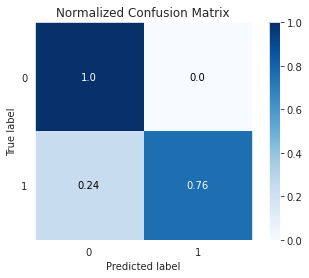

In [0]:
# plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_xpred, normalize = True)

# imprimir relatório de classificação 
print('Relatório de Classificação:\n', classification_report(y_test,y_xpred,digits=4))

# imprimir Acurácia 
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_xpred)))

# Imprimir área sobre curva 
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_xpred)))

* Tem os mesmos "problemas" do que o anterior 

## Conclusão

O DatSet tem uma grande quantidade de informações e após a normalização e balanceamento conseguimos criar modelos de ML para descobrir fraudes além de tirar pequenas conclusões a respeito da fraudes. 

O modelo de regressão logística apesar de ter menor acurácia, performou melhor nas métricas escolhidas de maior peso com recall e f1-score tendo vista os dados que possíveis falsos negativos podem causar a um banco com um grande volume de transações diárias. Existe espaço para melhorias no modelo, quem tiver interesse em tentar outras configurações pode usar livremente os códigos.
